In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

# Dataset

In [6]:
dataset= pd.read_csv("C:\\Users\\Devi\\Downloads\\Mall_Customers.csv")

In [7]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariate Analysis

In [8]:
df_1=dataset.loc[dataset['Age']==20]
df_2=dataset.loc[dataset['Age']==32]
df_3=dataset.loc[dataset['Age']==35]

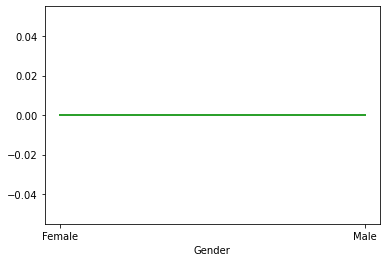

In [9]:
plt.plot(df_1['Gender'],np.zeros_like(df_1['Gender']))
plt.plot(df_2['Gender'],np.zeros_like(df_2['Gender']))
plt.plot(df_3['Gender'],np.zeros_like(df_3['Gender']))
plt.xlabel('Gender')
plt.show()

# Bi-Variate Analysis

C:\Users\Devi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


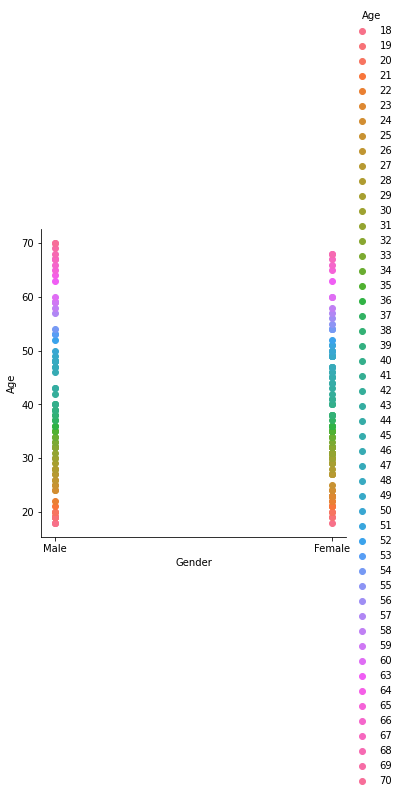

In [10]:
sns.FacetGrid(dataset,hue="Age",size=5).map(plt.scatter,"Gender","Age").add_legend();

# Multi-Variate Analysis

C:\Users\Devi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


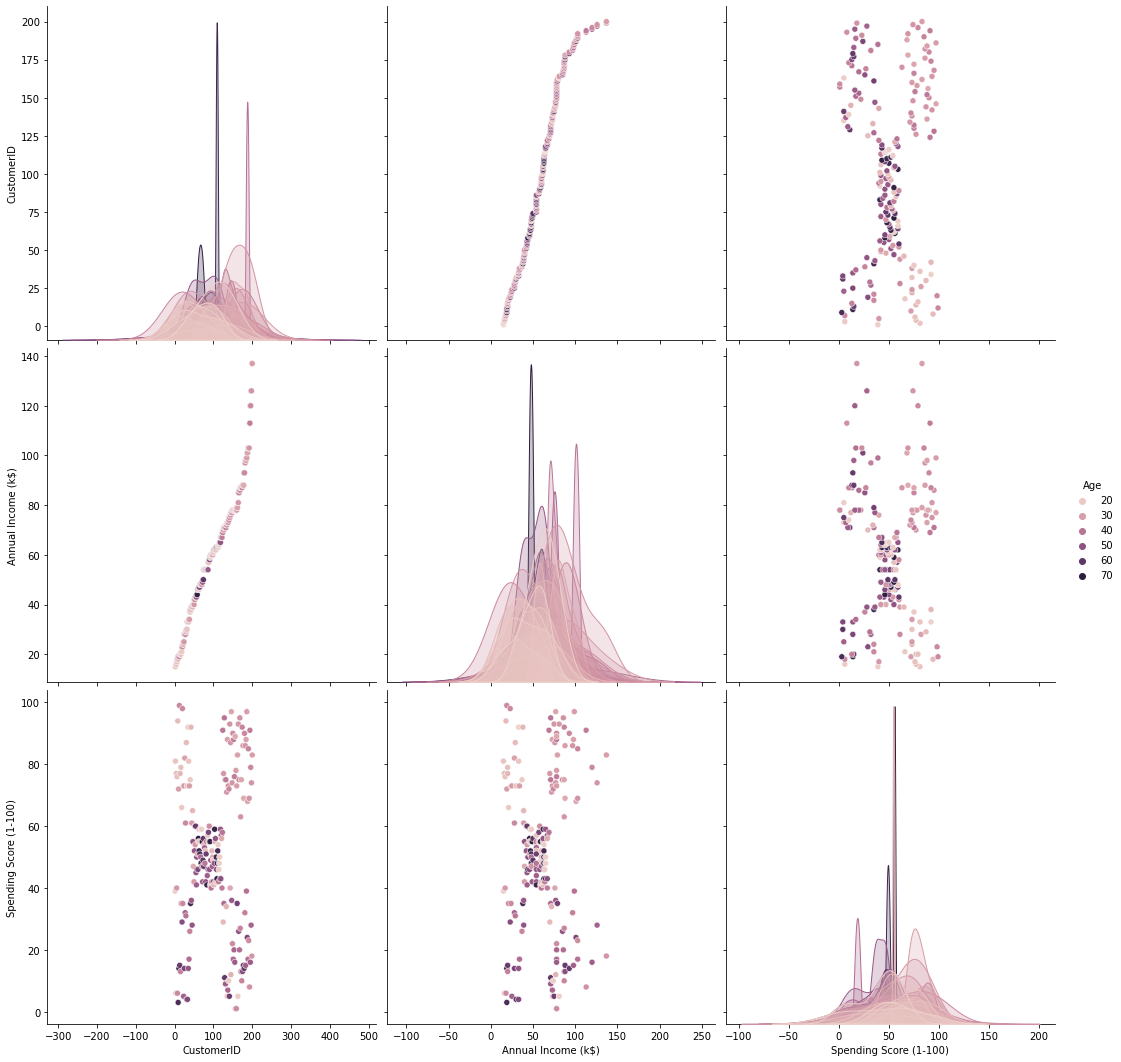

In [11]:
sns.pairplot(dataset,hue="Age",size=5)

# Descriptive statistics

In [12]:
dataset.sum()

CustomerID                                                            20100
Gender                    MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMa...
Age                                                                    7770
Annual Income (k$)                                                    12112
Spending Score (1-100)                                                10040
dtype: object

In [13]:
dataset.sum(axis=1)

C:\Users\Devi\AppData\Local\Temp\ipykernel_7092\3445892410.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.sum(axis=1)


0       74
1      119
2       45
3      120
4       93
      ... 
195    430
196    396
197    430
198    386
199    450
Length: 200, dtype: int64

In [14]:
dataset.median()

C:\Users\Devi\AppData\Local\Temp\ipykernel_7092\4167803218.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [15]:
dataset.mean()

C:\Users\Devi\AppData\Local\Temp\ipykernel_7092\1799472221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [16]:
dataset.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [17]:
dataset.std()

C:\Users\Devi\AppData\Local\Temp\ipykernel_7092\178401259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.std()


CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [18]:
dataset.var()

C:\Users\Devi\AppData\Local\Temp\ipykernel_7092\2458428038.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.var()


CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [19]:
Age=dataset.Age
Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [20]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Missing values

In [21]:
dataset.shape

(200, 5)

In [22]:
dataset.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [23]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
dataset.isnull().sum().sum()

0

# outliers

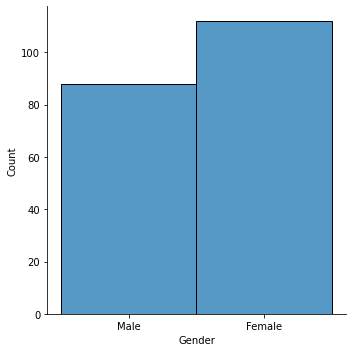

In [25]:
sns.displot(dataset['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

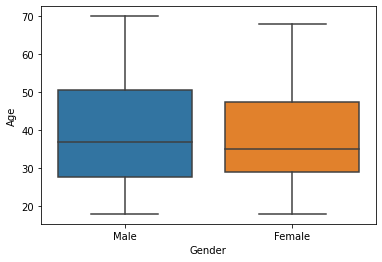

In [26]:
sns.boxplot(x='Gender',y='Age',data=dataset)

<AxesSubplot:ylabel='Age'>

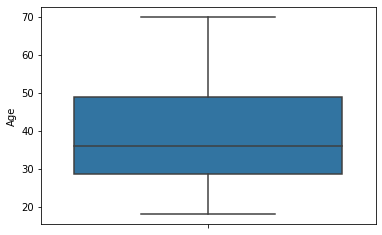

In [27]:
sns.boxplot(y='Age',data=dataset)

In [28]:
dataset['Age'].mean()

38.85

In [29]:
data1=dataset[dataset['Age']<30]

<AxesSubplot:ylabel='Age'>

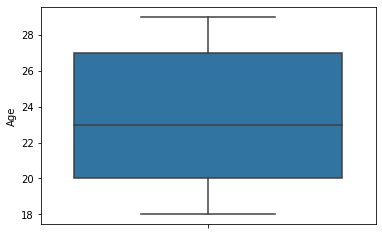

In [30]:
sns.boxplot(y='Age',data=data1)

# Categorial Encoding

In [31]:
data_tips=pd.get_dummies(dataset)
data_tips

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [32]:
one_encde=OneHotEncoder(sparse=False)
encoded_arr=one_encde.fit_transform(dataset[['Gender','Age']])
encoded_arr

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Split the data into dependent and independent variables

In [33]:
x=dataset.iloc[:,1:4]
y=dataset.iloc[:,4]
x
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

# Scale the independent variables

In [34]:
independent=dataset.iloc[1:,1:7].values

In [35]:
independent

array([['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72],
       ['Male', 67, 19, 14],
       ['Female', 35, 19, 99],
       ['Female', 58, 20, 15],
       ['Female', 24, 20, 77],
       ['Male', 37, 20, 13],
       ['Male', 22, 20, 79],
       ['Female', 35, 21, 35],
       ['Male', 20, 21, 66],
       ['Male', 52, 23, 29],
       ['Female', 35, 23, 98],
       ['Male', 35, 24, 35],
       ['Male', 25, 24, 73],
       ['Female', 46, 25, 5],
       ['Male', 31, 25, 73],
       ['Female', 54, 28, 14],
       ['Male', 29, 28, 82],
       ['Female', 45, 28, 32],
       ['Male', 35, 28, 61],
       ['Female', 40, 29, 31],
       ['Female', 23, 29, 87],
       ['Male', 60, 30, 4],
       ['Female', 21, 30, 73],
       ['Male', 53, 33, 4],
       ['Male', 18, 33, 92],
       ['Fema

# Scale the dependent variables

In [36]:
dependent=dataset.iloc[1:,9:].values
dependent

array([], shape=(199, 0), dtype=float64)

# Clustering

In [37]:
iris=datasets.load_iris()

x=scale(iris.data)

y=pd.DataFrame(iris.target)
variable_names=iris.feature_names
x[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

# Building and running the Model

In [38]:
clustering=KMeans(n_clusters=3,random_state=5)
clustering.fit(x)

KMeans(n_clusters=3, random_state=5)

# Plotting the model outputs

In [42]:
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns=['Targets']

Text(0.5, 1.0, 'K-Means Classification')

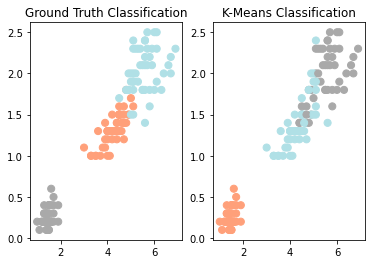

In [43]:
color_theme=np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target],s=50)

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

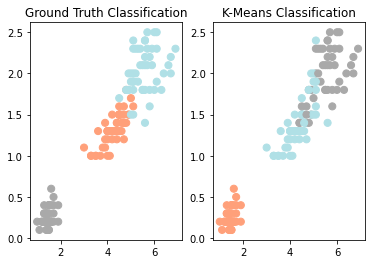

In [44]:
relabel=np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target],s=50)

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')

# Evaluate your clustering results

In [45]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



# Add the cluster data with the primary dataset


C:\Users\Devi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


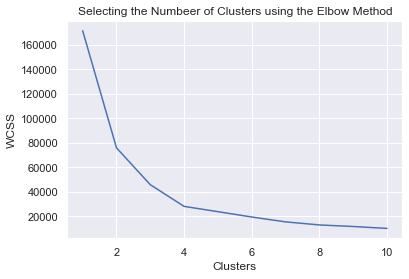

In [62]:
X = dataset[['Age', 'Spending Score (1-100)']].copy()

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
sns.set()

plt.plot(range(1, 11), wcss)

plt.title('Selecting the Numbeer of Clusters using the Elbow Method')

plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

# Gaussian Mixture Model (GMM)

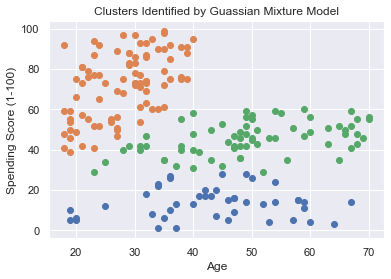

In [67]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data["Age"],data["Spending Score (1-100)"])
   
plt.title("Clusters Identified by Guassian Mixture Model")    
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Age")
plt.show()
    

# Spectral Clustering

[Text(0.5, 1.0, 'Spectral Clustering')]

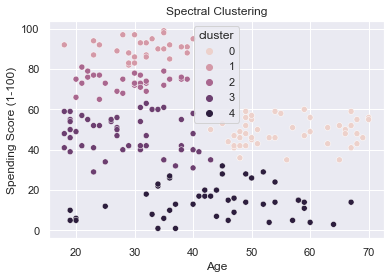

In [68]:
from sklearn.cluster import SpectralClustering
spectral_cluster_model= SpectralClustering(
    n_clusters=5, 
    random_state=25, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)
X['cluster'] = spectral_cluster_model.fit_predict(X[['Age', 'Spending Score (1-100)']])

fig, ax = plt.subplots()
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')

# Split the data into training and testing

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.2,random_state=5)

In [71]:
x_train

array([['Female', 56, 79, 35],
       ['Female', 54, 47, 59],
       ['Male', 42, 86, 20],
       ['Female', 50, 40, 55],
       ['Female', 54, 28, 14],
       ['Female', 20, 16, 6],
       ['Female', 31, 81, 93],
       ['Female', 31, 40, 42],
       ['Female', 29, 79, 83],
       ['Male', 40, 71, 95],
       ['Female', 23, 70, 29],
       ['Male', 68, 63, 43],
       ['Female', 49, 39, 28],
       ['Female', 38, 78, 76],
       ['Female', 19, 65, 50],
       ['Female', 27, 40, 47],
       ['Male', 36, 87, 10],
       ['Male', 26, 62, 55],
       ['Female', 67, 47, 52],
       ['Female', 63, 65, 43],
       ['Male', 40, 87, 13],
       ['Female', 54, 101, 24],
       ['Male', 70, 46, 56],
       ['Male', 30, 99, 97],
       ['Female', 24, 20, 77],
       ['Male', 26, 54, 54],
       ['Female', 38, 67, 40],
       ['Female', 32, 97, 86],
       ['Male', 35, 24, 35],
       ['Female', 27, 46, 51],
       ['Female', 68, 48, 48],
       ['Female', 35, 74, 72],
       ['Male', 63, 48, 51],

In [72]:
x_test

array([['Male', 27, 67, 56],
       ['Female', 23, 54, 52],
       ['Male', 34, 78, 90],
       ['Male', 43, 78, 17],
       ['Female', 27, 78, 89],
       ['Female', 44, 78, 20],
       ['Male', 39, 69, 91],
       ['Female', 23, 18, 94],
       ['Female', 23, 29, 87],
       ['Female', 60, 50, 49],
       ['Female', 41, 103, 17],
       ['Female', 21, 33, 81],
       ['Female', 46, 25, 5],
       ['Male', 24, 38, 92],
       ['Female', 51, 44, 50],
       ['Female', 21, 62, 42],
       ['Female', 31, 17, 40],
       ['Female', 65, 38, 35],
       ['Female', 51, 67, 43],
       ['Female', 29, 73, 88],
       ['Female', 37, 97, 32],
       ['Male', 35, 28, 61],
       ['Male', 47, 43, 41],
       ['Female', 36, 85, 75],
       ['Female', 50, 43, 45],
       ['Female', 32, 60, 42],
       ['Female', 52, 88, 13],
       ['Male', 52, 23, 29],
       ['Male', 69, 44, 46],
       ['Male', 48, 54, 46],
       ['Female', 45, 28, 32],
       ['Female', 30, 78, 78],
       ['Female', 31, 39, 61

In [73]:
y_train

array([], shape=(159, 0), dtype=float64)

In [74]:
y_test

array([], shape=(40, 0), dtype=float64)

# Build the Model

In [84]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [85]:
iris=datasets.load_iris()

In [91]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [87]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [88]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [92]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
x=iris.data
y=iris.target

In [94]:
x.shape

(150, 4)

In [95]:
y.shape

(150,)

In [96]:
clf=RandomForestClassifier()

In [97]:
clf.fit(x,y)

RandomForestClassifier()

In [98]:
print(clf.feature_importances_)

[0.09202863 0.02519588 0.46325048 0.41952501]


In [99]:
x[0]

array([5.1, 3.5, 1.4, 0.2])

In [100]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [101]:
print(clf.predict(x[[0]]))

[0]


In [102]:
print(clf.predict_proba(x[[0]]))

[[1. 0. 0.]]


In [103]:
clf.fit(iris.data,iris.target_names[iris.target])

RandomForestClassifier()

# Train & Test the model

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [105]:
x_train.shape,y_train.shape

((120, 4), (120,))

In [106]:
x_test.shape,y_test.shape

((30, 4), (30,))

In [107]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [108]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [109]:
print(clf.predict_proba([[5.1, 3.5, 1.4, 0.2]]))

[[1. 0. 0.]]


In [110]:
print(clf.predict(x_test))

[2 1 0 1 2 0 1 1 2 2 2 2 2 2 1 0 1 1 1 0 0 0 1 2 2 0 0 2 0 2]


In [111]:
print(y_test)

[2 2 0 1 2 0 1 1 2 2 2 2 2 2 1 0 1 1 1 0 0 0 1 2 2 0 0 2 0 2]


In [112]:
print(clf.score(x_test,y_test))

0.9666666666666667


# Measure the performance using Evaluation Metrics

In [113]:
import tracemalloc
import pandas as pd
import dask.dataframe as dd
import time


In [114]:
def tracing_start():
    tracemalloc.stop()
    print("nTracing Status : ", tracemalloc.is_tracing())
    tracemalloc.start()
    print("Tracing Status : ", tracemalloc.is_tracing())
def tracing_mem():
    first_size, first_peak = tracemalloc.get_traced_memory()
    peak = first_peak/(1024*1024)
    print("Peak Size in MB - ", peak)

In [115]:
tracing_start()
start = time.time()
sq_list1 = [elem + elem**2 for elem in range(1,1000)]
#print(sq_list1)
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
time elapsed 0.0 milli seconds
Peak Size in MB -  0.04711437225341797


In [116]:
tracing_start()
start = time.time()
list_word = ["Quantify","performance","improvements","in","Python"]
s = ""
for substring in list_word:
    s += substring + " "
print(s) 
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
Quantify performance improvements in Python 
time elapsed 0.0 milli seconds
Peak Size in MB -  0.0133209228515625


# Dataset Performance Measure

In [118]:
tracing_start()
start = time.time()

df_by_discipline = dataset.groupby('Age').count()[['CustomerID']]
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
time elapsed 31.098604202270508 milli seconds
Peak Size in MB -  0.15888595581054688
